In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def exp_decreasing(x, cumulative=8., starting=1.):
    a = starting
    b = a / cumulative
    density = a / np.exp(b * x)
    return density

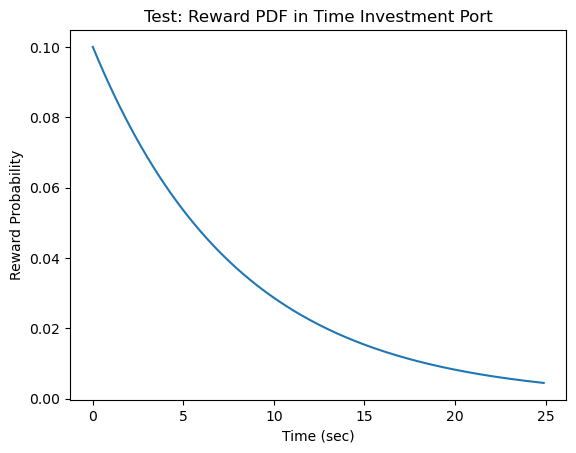

In [17]:
x = np.arange(0, 25, 0.1)
y = exp_decreasing(x)/10
plt.plot(x, y)
plt.title("Test: Reward PDF in Time Investment Port")
plt.xlabel("Time (sec)")
plt.ylabel("Reward Probability")
plt.show()

In [7]:
def cumulative_gain(x, cumulative=8., starting=1.):
    a = starting
    b = a / cumulative
    total_gain = cumulative * (1 - np.exp(-b * x))
    return total_gain

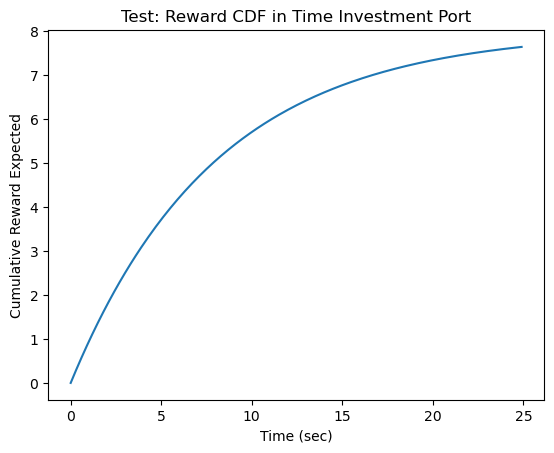

In [24]:
x = np.arange(0, 25, 0.1)
y = cumulative_gain(x)
plt.plot(x, y)
plt.title("Test: Reward CDF in Time Investment Port")
plt.xlabel("Time (sec)")
plt.ylabel("Cumulative Reward Expected")
plt.show()

In [35]:
def global_reward_gain(x, cumulative=8., starting=1.):
    a = starting
    b = a / cumulative
    local_gain = cumulative * (1 - np.exp(-b * x))
    global_gain = local_gain + 4
    return global_gain


def global_reward_rate(x, context_time=5, consumption_time=0.5, travel_time=0.5, cumulative=8., starting=1.):
    rou_g = global_reward_gain(x, cumulative=cumulative, starting=starting) / (
                x + context_time + consumption_time + travel_time * 2)
    return rou_g

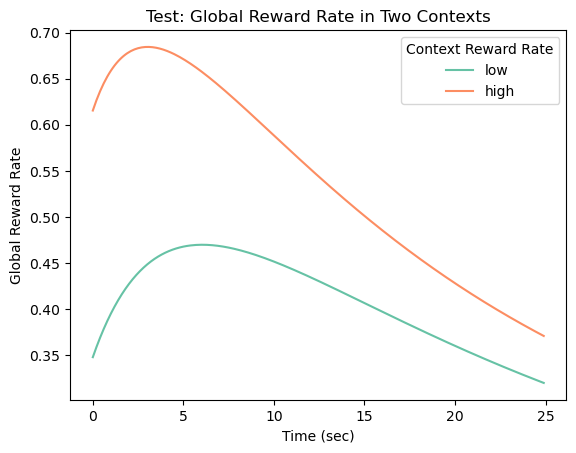

In [36]:
x = np.arange(0, 25, 0.1)
y_low = global_reward_rate(x, context_time=10)
y_high = global_reward_rate(x, context_time=5)
my_block_palette = sns.color_palette('Set2')
plt.plot(x, y_low, color=my_block_palette[0], label='low')
plt.plot(x, y_high, color=my_block_palette[1], label='high')
plt.legend(title='Context Reward Rate')
plt.title("Test: Global Reward Rate in Two Contexts")
plt.xlabel("Time (sec)")
plt.ylabel("Global Reward Rate")
plt.show()

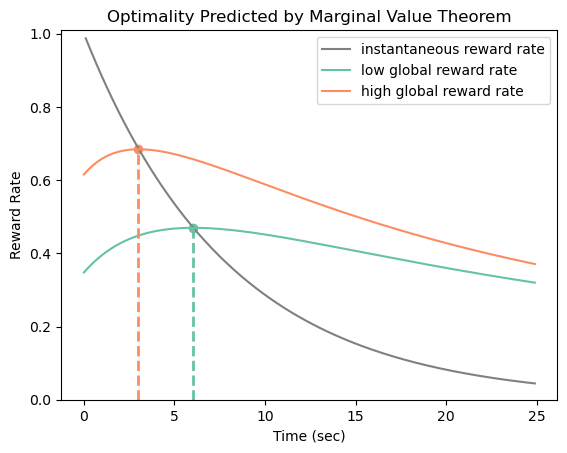

In [47]:
x = np.arange(0, 25, 0.1)
y_low = global_reward_rate(x, context_time=10)
y_high = global_reward_rate(x, context_time=5)
x_low_max_id = np.argmax(y_low)
x_high_max_id = np.argmax(y_high)
x_low_max = x[x_low_max_id]
x_high_max = x[x_high_max_id]
x_adjusted = np.arange(0.1, 25, 0.1)
y_intantaneous = exp_decreasing(x_adjusted)
my_block_palette = sns.color_palette('Set2')
plt.plot(x_adjusted, y_intantaneous, color='grey', label='instantaneous reward rate')
plt.plot(x, y_low, color=my_block_palette[0], label='low global reward rate')
plt.plot(x, y_high, color=my_block_palette[1], label='high global reward rate')
plt.scatter(x_low_max, global_reward_rate(x_low_max, context_time=10), color=my_block_palette[0])
plt.scatter(x_high_max, global_reward_rate(x_high_max, context_time=5), color=my_block_palette[1])
plt.vlines(x=x_low_max, ymin=0, ymax=global_reward_rate(x_low_max, context_time=10),
           color=my_block_palette[0], linestyle='--', lw=2)
plt.vlines(x=x_high_max, ymin=0, ymax=global_reward_rate(x_high_max, context_time=5),
           color=my_block_palette[1], linestyle='--', lw=2)
plt.legend()
plt.ylim([0, 1.01])
plt.title("Optimality Predicted by Marginal Value Theorem")
plt.xlabel("Time (sec)")
plt.ylabel("Reward Rate")
plt.show()